# Causes derrière la consommation de drogue 

Vous allez retouver sur ce notebook les différentes analyses effectuées dans l'optique de répondre à la problématique suivante :
- Peut-on prédire la consommation de drogue "dure" ou dangereuse selon la personnalité et l'environnement des jeunes (18-24) ?

URL to our dataset : https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Le dataset que nous allons traité a été collecté en 2016. 
Le traitement de notre data passera par un travail de classification afin de déterminer si des profils ressortent dans notre dataset.

Poure ce faire, nous allons passer par les étapes suivantes :
- Description et exploration en surface de la data
- Data Cleaning 
- Data Wrangling (exploration plus approffondie)
- Visualisation de la data (maintenant qu'on a un jeu de données exploitables, on peut le visualiser)
- Action (ML models etc )

In [1442]:
from mapping import *

---

## <p style = 'text-align: center;'>Chargement et Description des données</p> 

---

In [1443]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML 

css = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(css))

In [1444]:
# chargement des données
# noms des colonnes

data =  pd.read_csv('drug_consumption.csv', sep=",", header = None)
original_data = data.copy()


data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


Nom de chaque colonne : 

In [1445]:
data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')

Nous allons renommer ces colonnes 

In [1446]:
names_column = ['ID','age','gender','education','country','ethnicity','nscore','escore','oscore','ascore','cscore','iscore','sscore','alcohol','amphet','amyl','benzos','caff','cannabis','choc','coke','crack','ecstasy','heroin','ketamine','legalhigh','LSD','meth','mushrooms','nicotine','semer','VSabuse']

In [1447]:
columns_dict = dict(zip(list(range(len(data.columns))),names_column))

data.rename(columns = columns_dict, inplace = True)

#data.rename( columns = names_column )

In [1448]:
data.columns

Index(['ID', 'age', 'gender', 'education', 'country', 'ethnicity', 'nscore',
       'escore', 'oscore', 'ascore', 'cscore', 'iscore', 'sscore', 'alcohol',
       'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack',
       'ecstasy', 'heroin', 'ketamine', 'legalhigh', 'LSD', 'meth',
       'mushrooms', 'nicotine', 'semer', 'VSabuse'],
      dtype='object')

In [1449]:
print(data.describe)

<bound method NDFrame.describe of         ID      age   gender  education  country  ethnicity   nscore   escore  \
0        1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1        2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2        3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3        4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4        5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
...    ...      ...      ...        ...      ...        ...      ...      ...   
1880  1884 -0.95197  0.48246   -0.61113 -0.57009   -0.31685 -1.19430  1.74091   
1881  1885 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685 -0.24649  1.74091   
1882  1886 -0.07854  0.48246    0.45468 -0.57009   -0.31685  1.13281 -1.37639   
1883  1887 -0.95197  0.48246   -0.61113 -0.57009   -0.31685  0.91093 -1.92173   
1884  1888 -0.95197 -0.48246   -0.61113  0.21128   -0.31685 -0.46725  2.127

Nous allons travailler sur deux jeux de données : 
- data : jeu de données générales sur l'ensemble des ages 
- data_jeunes : jeu de données se focalisant sur les jeunes [18ans-25ans]

In [1450]:
# description des données/ nombre d'invidus et nombre de caractéristiques
# 1er jeu de données
data.shape

(1885, 32)

- 1885 rows -> 1885 d'individus 
- 32 columns : 32 caractéristiques d'individus

In [1451]:
# 2ème jeu de données
data_jeunes = data.loc[data['age'] == -0.95197]

In [1452]:
data_jeunes.shape

(643, 32)

In [1453]:
pourcentage_jeunes = (data_jeunes.shape[0]/data.shape[0])*100

In [1454]:
print('il y a ',data_jeunes.shape[0],' jeunes sur 1885 individus soit : ',round(pourcentage_jeunes,2), '% de jeunes dans notre jeu de données')

il y a  643  jeunes sur 1885 individus soit :  34.11 % de jeunes dans notre jeu de données


In [1455]:
# description des colonnes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   age        1885 non-null   float64
 2   gender     1885 non-null   float64
 3   education  1885 non-null   float64
 4   country    1885 non-null   float64
 5   ethnicity  1885 non-null   float64
 6   nscore     1885 non-null   float64
 7   escore     1885 non-null   float64
 8   oscore     1885 non-null   float64
 9   ascore     1885 non-null   float64
 10  cscore     1885 non-null   float64
 11  iscore     1885 non-null   float64
 12  sscore     1885 non-null   float64
 13  alcohol    1885 non-null   object 
 14  amphet     1885 non-null   object 
 15  amyl       1885 non-null   object 
 16  benzos     1885 non-null   object 
 17  caff       1885 non-null   object 
 18  cannabis   1885 non-null   object 
 19  choc       1885 non-null   object 
 20  coke    

Incohérence au niveau des types compte tenu des variables avec lesquelles nous allons travailler.\
Exemple : Age devrait être un Integer pas un float et l'éthnicité qui est une variable à priori, nominale ne peut pas être Float non plus.

Nous allons dès lors essayer de mieux comprendre cers incohérences

Nous observons trois Grands types de colonnes : 
- Colonnes décrivant le profil de l'individu ( profil )<br />---> nous permettra d'en savoir plus sur son environnement de vie.

- Colonnes décrivant la personnalité de l'individu ( perso )<br />---> nous permettra d'en savoir plus sur ses traits de personnalité.

- Colonnes décrivant la fréquence de consommation de drogues ( drugs )<br />---> nous permettra de définir notre Target ( predicting the consommation is what we are searching for )


In [1456]:
l_perso = list(range(6,13))
l_drugs = list(range(13,32))

l_perso.append(0)
l_drugs.append(0)

In [1457]:
profil = data.iloc[:,0:6]
profil.set_index('ID',inplace = True)

perso = data.iloc[:,l_perso]
perso.set_index('ID',inplace = True)

drugs = data.iloc[:,l_drugs]
drugs.set_index('ID',inplace = True)

profil_jeunes = data_jeunes.iloc[:,0:6]
profil_jeunes.set_index('ID',inplace = True)

perso_jeunes = data_jeunes.iloc[:,l_perso]
perso_jeunes.set_index('ID',inplace = True)

drugs_jeunes = data_jeunes.iloc[:,l_drugs]
drugs_jeunes.set_index('ID',inplace = True)

In [1458]:
drugs

,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,semer,VSabuse
ID,,,,,,,,,,,,,,,,,,,
1,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1885,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1886,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0


Décrivons en premier lieu les colonnes décrivant le profil de l'individu\
Les colonnes 'profil' :
- ID : Categorical variable
- Age : Interval variable 
- Genre : Categorical variable 
- Education : Ordinal Variable 
- Pays : Categorical Variable 
- Ethnicité : Categorical Variable 

Soit 6 colonnes.

In [1459]:
for i in range(1,6) :
    print('La colonne \'',names_column[i],'\' a ',len(profil.iloc[:,i-1].unique()),' valeurs uniques ',data.iloc[:,i].unique(),'\n')
    


La colonne ' age ' a  6  valeurs uniques  [ 0.49788 -0.07854 -0.95197  2.59171  1.09449  1.82213] 

La colonne ' gender ' a  2  valeurs uniques  [ 0.48246 -0.48246] 

La colonne ' education ' a  9  valeurs uniques  [-0.05921  1.98437  1.16365 -1.22751 -1.7379   0.45468 -0.61113 -2.43591
 -1.43719] 

La colonne ' country ' a  7  valeurs uniques  [ 0.96082  0.24923 -0.57009 -0.28519 -0.09765  0.21128 -0.46841] 

La colonne ' ethnicity ' a  7  valeurs uniques  [ 0.126   -0.31685  0.1144  -0.22166 -0.50212 -1.10702  1.90725] 



Conclusion :
Nous pouvons observer que les colonnes 'profil' sont dans l'ensemble catégorique (même si à première vue, les valeurs étant numériques, nous aurions pu penser autrement) et donc que pour leur visualisation, des valeurs de type string seraient plus appropiées à priori.

---

Décrivons les colonnes décrivant la personnalité l'individu\
Les colonnes 'perso':

- les colonnes se basant sur le test NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness),
- la colonne impulsivité selon le test BIS-11 (impulsivity), 
- la colonne de sensation selon le test ImpSS (sensation seeking)

Soit 7 colonnes.

In [1460]:
for i in range(6,10) :
    print('La colonne \'',names_column[i],'\' a ',len(data.iloc[:,i].unique()),' valeurs uniques ',data.iloc[:,i].unique(),'\n')


La colonne ' nscore ' a  49  valeurs uniques  [ 0.31287 -0.67825 -0.46725 -0.14882  0.73545 -1.32828  0.62967 -0.24649
 -1.05308  2.28554 -0.79151 -0.92104 -2.05048 -1.55078  0.52135  1.37297
 -0.34799 -1.1943   0.41667  1.60383 -0.05188  0.04257  1.02119  0.82562
  0.13606  1.13281 -1.43907 -0.58016  0.22393 -2.21844  0.91093 -2.3436
  1.8399   1.49158  3.27393 -1.69163  1.98437  2.82196  1.23461 -1.86962
  2.127   -2.42317  2.46262  1.72012  2.61139 -2.75696 -2.52197 -3.15735
 -3.46436] 

La colonne ' escore ' a  42  valeurs uniques  [-0.57545  1.93886  0.80523 -0.80615 -1.6334  -0.30033 -1.09207  2.57309
  0.00332  0.16767  1.45421 -1.50796 -1.23177 -0.15487 -1.7625   0.47617
 -0.94779 -3.27393  0.63779 -0.43999  1.74091  0.32197  1.2861   0.96248
  1.11406 -0.69509  1.58487 -1.37639 -1.92173  3.00537  2.127    2.32338
 -2.21069 -2.32338 -2.11437 -2.72827 -2.5383  -2.44904 -2.03972  2.8595
  3.27393 -3.00537] 

La colonne ' oscore ' a  35  valeurs uniques  [-0.58331  1.43533 -0.8473

In [1461]:
for i in range(10,13) :
    print('La colonne \'',names_column[i],'\' a ',len(data.iloc[:,i].unique()),' valeurs uniques ',data.iloc[:,i].unique(),'\n')

La colonne ' cscore ' a  41  valeurs uniques  [-0.00665 -0.14277 -1.0145   0.58489  1.30612  1.63088  0.93949  1.13407
  0.12331  1.81175 -0.52745 -0.78155  3.46436  0.7583  -1.38502 -1.5184
 -1.13788 -0.89891  1.46191 -2.18109 -0.65253  0.41594 -0.40581  0.25953
 -1.92173 -0.27607 -1.64101  2.04506  2.33337 -1.25773  2.63199 -2.90161
 -1.78169 -2.04506 -2.57309 -2.30408 -2.42317 -3.15735 -3.46436 -2.72827
  3.00537] 

La colonne ' iscore ' a  10  valeurs uniques  [-0.21712 -0.71126 -1.37983  0.19268  0.52975  1.29221  1.86203 -2.55524
  0.88113  2.90161] 

La colonne ' sscore ' a  11  valeurs uniques  [-1.18084 -0.21575  0.40148 -1.54858  0.07987 -0.52593 -0.84637  1.2247
  0.7654  -2.07848  1.92173] 



Conclusion : Nous pouvons observer que les colonnes 'perso' sont dans l'ensemble catégorique (même si à première vue, les valeurs étant numériques, nous aurions pu penser autrement) et donc que pour leur visualisation, des valeurs de type string seraient plus appropiées à priori.

---

Les colonnes  nscore, escore, oscore, ascore, cscore, iscore, sscore contiennent les résultats de divers tests psychologiques.

Le  nscore correspond au résultat au test mesurant la résistance au stress et la stabilité émotionnelle.
Une valeur élevée à ce test indique que la personne est plutôt nerveuse, inquiète, affectée par le stress et sujette au changements d'humeur.

Le escore correspond au résultat au test mesurant l'introversion ou l'extraversion.
Une valeur élevée à ce test indique que la personne est plutôt extravertie.

Le oscore correspond au résultat au test mesurant l'ouverture au monde.
Une valeur élevée à ce test indique que la personne est plutôt ouverte sur le monde, créative, aventureuse mais qu'elle est imprévisible et a du mal à rester concentrée.

Le ascore correspond au résultat au test mesurant le comportement avec les autres.
Une valeur élevée à ce test indique que la personne est plutôt amicale, coopérative, intéressée par les autres.

Le cscore correspond au résultat au test mesurant la spontanéité.
Une valeur élevée à ce test indique que la personne est plutôt organisée, efficace, travailleuse.

Le iscore correspond au résultat au test mesurant l'impulsivité'.
Une valeur élevée à ce test indique que la personne est plutôt impulsive.

Le sscore correspond au résultat au test mesurant la recherche de sensation'.
Une valeur élevée à ce test indique que la personne est plutôt avide de sensations.

---

In [1462]:
categorical_columns = (data.dtypes == 'object')
object_cols = list(categorical_columns[categorical_columns].index)

In [1463]:
object_cols

['alcohol',
 'amphet',
 'amyl',
 'benzos',
 'caff',
 'cannabis',
 'choc',
 'coke',
 'crack',
 'ecstasy',
 'heroin',
 'ketamine',
 'legalhigh',
 'LSD',
 'meth',
 'mushrooms',
 'nicotine',
 'semer',
 'VSabuse']

La dangerosité de chaque drogue est classée selon ce site : 
https://www.frontiersin.org/files/Articles/592199/fpsyt-11-592199-HTML/image_m/fpsyt-11-592199-g001.jpg <br>
C'est un travail de recherche en amont mais le taux de dangerosité de chaque drogue sera prouvée plus tard lors de la phase de pondération, avec un autre jeu de données. Pour le moment, tout ce qui nous intéresse, c'est le fait qu'elle soit considérée comme possiblement dangereuse.
<br><br>
La liste des drogues considérées "dures" et "douces" ici :<br>
https://www.zamnesia.fr/blog-la-classification-des-drogues-dures-et-douces-n1425


Décrivons désormais les colonnes mettant en avant la fréquence de consommation de l'individu\
Les colonnes 'drugs' sont chacune caractéristiques d'une drogue:
- l'alcool : <font color = 'red'>3ème plus dangereuse</font> et <font color = 'red'>'dure'</font>
- l'amphétamine : <font color = 'red'>5ème plus dangereuse</font> et <font color = 'red'>'dure'</font>
- le nitrite d'amyl (utilisation des poppers) : <font color = 'yellow'>Pas considérée comme drogue dure</font> 
- le benzodiazepine : <font color = 'orange'>9ème plus dangereuse</font> et <font color = 'red'>'dure'</font>
- la caffeine : <font color ='green'>Pas considéré comme dangereuse</font>
- le cannabis : <font color = 'orange'>10ème plus dangereuse</font> mais <font color = 'green'>'douce'</font>
- le chocolat : <font color ='green'>Pas considéré comme dangereuse</font>
- la cocaine : <font color = 'red'>4ème plus dangereuse</font> et <font color = 'red'>'dure'</font>
- le crack : <font color = 'red'>1ère plus dangereuse</font> et <font color = 'red'>'dure'</font>
- l'ectasy : <font color = 'orange'>7ème plus dangereuse</font> et <font color = 'red'>'dure'</font>
- l'heroin : <font color = 'red'>2ème plus dangereuse</font> et <font color = 'red'>'dure'</font>
- la ketamine : <font color = 'orange'>8ème plus dangereuse</font> et <font color = 'red'>'dure'</font>
- les euphorisants légaux/Legal Highs (comme les cannabinoides synthétiques) : <font color = 'orange'>6ème plus dangereuse</font> mais <font color = 'green'>'douce'</font>
- le LSD : <font color = 'orange'>12ème plus dangereuse</font> et <font color = 'red'>'dure'</font>
- la methadone : <font color = 'orange'>14ème plus dangereuse</font> et <font color = 'red'>'dure'</font>
- les champignons magiques or magics Mushrooms : <font color = 'orange'>11ème plus dangereuse</font> et <font color = 'red'>'dure'</font>
- la nicotine : <font color = 'orange'>13ème plus dangereuse</font>
- la Semeron : <font color = 'yellow'>Pas considérée comme drogue dure et pas d'information sur sa dangerosité</font>
- Les substances volatiles (Abusement) : <font color = 'yellow'>Pas considérée comme drogue dure</font>

Soit 19 colonnes.

In [1464]:
list(drugs.columns)

['alcohol',
 'amphet',
 'amyl',
 'benzos',
 'caff',
 'cannabis',
 'choc',
 'coke',
 'crack',
 'ecstasy',
 'heroin',
 'ketamine',
 'legalhigh',
 'LSD',
 'meth',
 'mushrooms',
 'nicotine',
 'semer',
 'VSabuse']

In [1465]:
drugs.dtypes

alcohol      object
amphet       object
amyl         object
benzos       object
caff         object
cannabis     object
choc         object
coke         object
crack        object
ecstasy      object
heroin       object
ketamine     object
legalhigh    object
LSD          object
meth         object
mushrooms    object
nicotine     object
semer        object
VSabuse      object
dtype: object

In [1466]:
drugs_drop_NoDangerous = ['amyl','caff','choc','semer','VSabuse'] # pas considérée dangereuse

drugs_danger = ['crack','heroin','alcohol','coke','amphet','legalhigh',
                'ecstasy','ketamine','benzos','cannabis','mushrooms',
                'LSD','nicotine','methadone']
drugs_danger_ranking = dict(zip(list(range(1,15)),drugs_danger))

drugs_douce = ['amyl','cannabis','legalhigh','semer','VSabuse','caff','choc']
drugs_dure = list(filter(lambda i:i not in drugs_douce,list(drugs.columns)))


In [1467]:
drugs_dure

['alcohol',
 'amphet',
 'benzos',
 'coke',
 'crack',
 'ecstasy',
 'heroin',
 'ketamine',
 'LSD',
 'meth',
 'mushrooms',
 'nicotine']

In [1468]:
drugs_danger_ranking

{1: 'crack',
 2: 'heroin',
 3: 'alcohol',
 4: 'coke',
 5: 'amphet',
 6: 'legalhigh',
 7: 'ecstasy',
 8: 'ketamine',
 9: 'benzos',
 10: 'cannabis',
 11: 'mushrooms',
 12: 'LSD',
 13: 'nicotine',
 14: 'methadone'}

Nous allons donner plutard une pondération  à chaque colonne selon sa dangerosité ! (Lors du modeling à l'aide du deuxième dataset)

Voici les valeurs uniques issues de chaque colonne avec la fréquence de chaque valeur unique chez les jeunes :

In [1469]:
drugs_frequency_jeunes_int = (round((drugs_jeunes.apply(pd.value_counts))*100/drugs_jeunes.shape[0],2))

In [1470]:
drugs_frequency_all_int =  (round((drugs.apply(pd.value_counts))*100/drugs.shape[0],2))

In [1471]:
drugs_frequency_jeunes = drugs_frequency_jeunes_int.copy().astype(str)

In [1472]:
drugs_frequency_all = drugs_frequency_all_int.copy().astype(str)

In [1473]:
def join(x) :
    return x + '%'


In [1474]:
for el in list(drugs.columns) :
    drugs_frequency_jeunes[el] = drugs_frequency_jeunes[el].apply(join)
    drugs_frequency_all[el] = drugs_frequency_all[el].apply(join)


In [1475]:
display(drugs_frequency_jeunes)
display(drugs_frequency_all)

# proportion des jeunes dans les fréquences

,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,semer,VSabuse
CL0,2.18%,47.59%,75.58%,51.48%,0.31%,9.02%,1.09%,54.28%,88.34%,38.41%,84.6%,74.03%,29.39%,49.61%,66.1%,42.77%,16.64%,99.07%,72.01%
CL1,nan%,0.16%,0.31%,0.47%,0.16%,0.47%,0.16%,0.47%,0.16%,0.16%,nan%,0.31%,0.16%,0.47%,0.16%,0.16%,0.31%,0.31%,2.64%
CL2,2.02%,11.98%,12.75%,10.26%,1.56%,7.15%,0.31%,10.11%,4.98%,10.89%,4.51%,4.98%,14.31%,7.31%,5.91%,11.98%,7.47%,0.16%,14.0%
CL3,11.66%,19.91%,8.09%,16.95%,4.04%,12.44%,3.73%,21.0%,5.29%,26.75%,5.29%,12.44%,32.35%,23.33%,14.62%,28.15%,14.15%,0.31%,7.62%
CL4,18.82%,7.62%,2.33%,10.58%,8.55%,12.13%,21.31%,8.4%,0.62%,15.71%,2.64%,4.35%,11.51%,10.58%,4.67%,12.75%,10.58%,0.16%,1.56%
CL5,42.15%,5.91%,0.62%,4.51%,20.53%,17.73%,35.93%,4.04%,0.62%,5.6%,1.4%,3.58%,6.69%,7.31%,3.73%,4.2%,13.06%,nan%,1.4%
CL6,23.17%,6.84%,0.31%,5.75%,64.85%,41.06%,37.48%,1.71%,nan%,2.49%,1.56%,0.31%,5.6%,1.4%,4.82%,nan%,37.79%,nan%,0.78%


,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,semer,VSabuse
CL0,1.8%,51.78%,69.23%,53.05%,1.43%,21.91%,1.7%,55.07%,86.31%,54.16%,85.15%,79.05%,58.04%,56.71%,75.81%,52.1%,22.71%,99.58%,77.19%
CL1,1.8%,12.2%,11.14%,6.15%,0.53%,10.98%,0.16%,8.49%,3.55%,5.99%,3.61%,2.39%,1.54%,13.74%,2.07%,11.09%,10.24%,0.11%,10.61%
CL2,3.61%,12.89%,12.57%,12.41%,1.27%,14.11%,0.53%,14.32%,5.94%,12.41%,4.99%,7.53%,10.5%,9.39%,5.15%,13.79%,10.82%,0.16%,7.16%
CL3,10.5%,10.5%,4.88%,12.52%,3.18%,11.19%,2.86%,13.69%,3.13%,14.69%,3.45%,6.84%,17.14%,11.35%,7.9%,14.59%,9.81%,0.11%,3.24%
CL4,15.23%,3.98%,1.27%,6.37%,5.62%,7.43%,15.7%,5.25%,0.48%,8.28%,1.27%,2.23%,5.84%,5.15%,2.65%,6.1%,5.73%,0.05%,0.69%
CL5,40.27%,3.24%,0.74%,4.46%,14.48%,9.81%,36.23%,2.18%,0.48%,3.34%,0.85%,1.75%,3.4%,2.97%,2.55%,2.12%,8.33%,nan%,0.74%
CL6,26.79%,5.41%,0.16%,5.04%,73.47%,24.56%,42.81%,1.01%,0.11%,1.11%,0.69%,0.21%,3.55%,0.69%,3.87%,0.21%,32.36%,nan%,0.37%


- Comme on pouvait l'imaginer, on peut observer que la plupart des drogues les plus "dures" sont les moins utilisées de par leur dangerosité. (<font color = 'green'>Précisions dans la Data Visualisation</font>)
- On peut également observer que CL1 (used over the last decade) n'est pas trop applicable dans le cas des jeunes et qu'on laissera ces cas isolés de côté. (<font color = 'green'>Précisions dans le Data Wrangling</font>)
- On peut remarquer aussi des pourcentages assez élévé en termes d'utilisation du cannabis chez les jeunes (<font color = 'green'>Précisions dans la Data Visualisation</font>)

In [1476]:
for i in range(13,32) :
    print('La colonne \'',names_column[i],'\' a ',len(data.iloc[:,i].unique()),' valeurs uniques ',data.iloc[:,i].unique(),'\n')


La colonne ' alcohol ' a  7  valeurs uniques  ['CL5' 'CL6' 'CL4' 'CL2' 'CL1' 'CL0' 'CL3'] 

La colonne ' amphet ' a  7  valeurs uniques  ['CL2' 'CL0' 'CL1' 'CL3' 'CL5' 'CL4' 'CL6'] 

La colonne ' amyl ' a  7  valeurs uniques  ['CL0' 'CL2' 'CL1' 'CL3' 'CL5' 'CL4' 'CL6'] 

La colonne ' benzos ' a  7  valeurs uniques  ['CL2' 'CL0' 'CL3' 'CL1' 'CL4' 'CL5' 'CL6'] 

La colonne ' caff ' a  7  valeurs uniques  ['CL6' 'CL5' 'CL4' 'CL3' 'CL0' 'CL1' 'CL2'] 

La colonne ' cannabis ' a  7  valeurs uniques  ['CL0' 'CL4' 'CL3' 'CL2' 'CL1' 'CL6' 'CL5'] 

La colonne ' choc ' a  7  valeurs uniques  ['CL5' 'CL6' 'CL4' 'CL0' 'CL3' 'CL2' 'CL1'] 

La colonne ' coke ' a  7  valeurs uniques  ['CL0' 'CL3' 'CL2' 'CL1' 'CL6' 'CL5' 'CL4'] 

La colonne ' crack ' a  7  valeurs uniques  ['CL0' 'CL1' 'CL2' 'CL3' 'CL5' 'CL4' 'CL6'] 

La colonne ' ecstasy ' a  7  valeurs uniques  ['CL0' 'CL4' 'CL1' 'CL3' 'CL2' 'CL6' 'CL5'] 

La colonne ' heroin ' a  7  valeurs uniques  ['CL0' 'CL1' 'CL2' 'CL3' 'CL5' 'CL6' 'CL4'] 

La c

- CL0 : Never Used  (0)
- CL1 : Used over a decade (1)
- CL2 : Used in Last Decade (2)
- CL3 : Used in Last Year (3)
- CL4 : Used in Last month (4)
- CL5 : Used Last week (5)
- CL6 : Used in Last day (6)

---

## <p style = 'text-align: center;'>Data Cleaning and Wrangling</p> 

---

Cette partie sera dédiée au nettoyage (renommer les colonnes,reset des index, drop des colonnes, ) et à la mise en forme de la donnée pour que cette dernière soit prête à l'exploitation

In [1477]:
data.head()

,ID,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,semer,VSabuse
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


#### Nous allons commencer par drop les colonnes qui ne nous intéressent pas.
Il y a deux types de colonnes que nous allons drop :
- celles qui n'ont pas d'intérêt dans le sujet (Par exemple, comme nous travaillons avec les drogues dures, le chocolat n'a rien à faire ici)
- celles qui n'ont pas d'intérêt dans le dataset (Par exemple, si la fréquence de C0 est très grande pour les drogues, ce qui veut dire que ce n'est pas des drogues utilisées ou les Outliers)

<font color = 'red'>ARTHUR -> colonnes personnalité to drop</font>

In [1478]:
# initialisons la liste qui contiendra les noms de colonnes à drop
to_drop = []

In [1479]:
# fréquence de CO trop grande 
drugs_frequency_used = drugs_frequency_jeunes_int.reset_index(drop = True).iloc[0]

In [1480]:
drugs_frequency_used.info()

<class 'pandas.core.series.Series'>
Index: 19 entries, alcohol to VSabuse
Series name: 0
Non-Null Count  Dtype  
--------------  -----  
19 non-null     float64
dtypes: float64(1)
memory usage: 860.0+ bytes


In [1481]:
drugs_frequency_used[drugs_frequency_used >= 90] # 90

semer    99.07
Name: 0, dtype: float64

La seule drogue qui n'est quasi pas utilisée par les jeunes est le semeron et elle fait déjà partie des drogues considérées comme 'non dure'.

In [1482]:
# les colonnes 'profil' sont toutes plus ou moins utiles à part 'ID'
# qui nous sert plus à identifier chaque ligne quelque soit le changement fait sur les index

# les colonnes 'perso' sont toutes utiles

# les colonnes 'drogues' ne sont pas toutes utiles

#
to_drop.extend(drugs_drop_NoDangerous) # pas d'intérêt dans la problématique

In [1483]:
data.drop(to_drop,inplace = True, axis = 1)

In [1484]:
to_drop.append('age')

In [1485]:
data_jeunes.drop(to_drop,inplace = True, axis = 1) 
# on drop age dans ce jeu de données mais pas dans le 1er comme la colonne n'a qu'une seule valeur unique


C:\Users\arthu\AppData\Local\Temp\ipykernel_15892\2499484773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_jeunes.drop(to_drop,inplace = True, axis = 1)


In [1486]:
to_drop

['amyl', 'caff', 'choc', 'semer', 'VSabuse', 'age']

In [1487]:
display(data.head(3))
display(data_jeunes.head(3))

,ID,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0


,ID,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
3,4,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2
33,34,-0.48246,0.45468,0.96082,-0.31685,0.41667,-0.30033,0.29338,1.28610,-0.14277,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
154,155,0.48246,-0.61113,0.96082,-0.31685,2.82196,-1.37639,0.72330,-0.45321,0.58489,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0


#### Après avoir étudié les colonnes, nous passons aux index :

In [1488]:
first_row = data.iloc[0]
last_row = data.iloc[-1]

In [1489]:
pd.DataFrame(first_row).T

,ID,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
0,1,0.49788,0.48246,-0.05921,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2


In [1490]:
pd.DataFrame(last_row).T

,ID,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
1884,1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.127,1.65653,1.11406,...,CL3,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6


In [1491]:
display(data.head(2))
display(data.tail(2))

,ID,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4


,ID,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4
1884,1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,...,CL3,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6


On peut voir qu'il ya un décalage étrange entre l'écart initial de l'ID et de l'index aux premières lignes et l'écart qu'on voit aux dernières lignes.\
Nous allons donc voir à quel niveau l'aggrandissement de l'écart occurre en comparant les valeurs index et ID

In [1492]:
# On commence par décaler les valeurs de la colonne ID 
# afin qu'elle puisse matcher avec les valeurs des index

data['ID'].index = data['ID'].index + 1 
Data_ID = pd.concat([pd.Series([0]),data['ID'][:-1]])
Data_ID

C:\Users\arthu\AppData\Local\Temp\ipykernel_15892\2102262434.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  Data_ID = pd.concat([pd.Series([0]),data['ID'][:-1]])


0          0
1          1
2          2
3          3
4          4
        ... 
1880    1883
1881    1884
1882    1885
1883    1886
1884    1887
Length: 1885, dtype: int64

In [1493]:
# et on compare
pd.Series(data.index).compare(Data_ID)

,self,other
294,294.0,295.0
295,295.0,296.0
296,296.0,297.0
297,297.0,298.0
298,298.0,300.0
...,...,...
1880,1880.0,1883.0
1881,1881.0,1884.0
1882,1882.0,1885.0
1883,1883.0,1886.0


Avec cette comparaison nous pouvons affirmer que le décalage a commencé avec la ligne 294.

Vérifions qu'il n y ait pas d'anomalie aux alentours de cette ligne.

In [1494]:
data.iloc[290:296]

,ID,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
290,291,0.49788,0.48246,-0.05921,0.96082,-1.10702,-0.92104,0.96248,-0.84732,1.45039,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
291,292,0.49788,0.48246,-0.61113,0.96082,-0.31685,0.62967,-1.09207,0.44585,-0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL4
292,293,1.09449,0.48246,-0.05921,0.96082,-0.31685,-0.05188,-0.15487,-0.58331,-0.60633,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
293,295,-0.07854,0.48246,-0.05921,0.96082,-0.31685,1.13281,0.00332,-0.17779,-0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6
294,296,-0.95197,0.48246,-1.43719,0.96082,-0.31685,-0.34799,0.47617,-0.17779,-0.60633,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
295,297,0.49788,-0.48246,-0.05921,0.96082,-0.31685,1.37297,-0.43999,0.14143,-0.01729,...,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL0,CL2


Aucune anomalie à priori outre le fait qu"il manque l'individu dont l'ID est 294 et pas seulement vu l'écart qu'on a observé un peu plus haut. ( 3 ID manquant dont le premier est 294)


Cependant peut être qu'une anomalie n'est pas directement visible mais afin de donner une <font color = 'cyan'>unicité à chaque ligne</font> et <font color =cyan>ne pas avoir deux valeurs différentes pour la caractériser</font>, nous allons utiliser les valeurs de la colonne ID comme index !

Vérifions que chaque valeur de la colonne est unique 

In [1495]:
data['ID'].is_unique

True

In [1496]:
data.set_index('ID',inplace = True)

In [1497]:
data_jeunes.set_index('ID',inplace = True)

In [1498]:
display(data.head(5))
display(data_jeunes.head(5))

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2


,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,iscore,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
ID,,,,,,,,,,,,,,,,,,,,,
4,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2
34,-0.48246,0.45468,0.96082,-0.31685,0.41667,-0.30033,0.29338,1.28610,-0.14277,-0.71126,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
155,0.48246,-0.61113,0.96082,-0.31685,2.82196,-1.37639,0.72330,-0.45321,0.58489,-0.21712,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
167,-0.48246,-0.61113,0.96082,-0.31685,1.49158,-1.23177,0.72330,-2.35413,-1.92173,0.88113,...,CL3,CL3,CL0,CL0,CL0,CL2,CL0,CL0,CL3,CL6
170,0.48246,-1.22751,0.96082,-0.31685,-0.34799,0.00332,-1.42424,0.59042,-0.14277,-0.71126,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL4


In [1499]:
del first_row['ID']

In [1500]:
# on vérifie
first_row.equals(data.loc[1])
# Si c'est True, c'est que le set_index() s'est bien déroulée

True

In [1501]:
display(pd.DataFrame(data.loc[1]).T)
display(pd.DataFrame(first_row).T)

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
1,0.49788,0.48246,-0.05921,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2


,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
0,0.49788,0.48246,-0.05921,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2


#### Nous allons nettoyer désormais les colonnes :
- Vérifier qu'il n y a pas plusieurs types de valeurs par colonne 
- Mapping

In [1502]:
data.dtypes

age          float64
gender       float64
education    float64
country      float64
ethnicity    float64
nscore       float64
escore       float64
oscore       float64
ascore       float64
cscore       float64
iscore       float64
sscore       float64
alcohol       object
amphet        object
benzos        object
cannabis      object
coke          object
crack         object
ecstasy       object
heroin        object
ketamine      object
legalhigh     object
LSD           object
meth          object
mushrooms     object
nicotine      object
dtype: object

Après inspection :
-  on peut voir que les colonnes 'drugs' sont de type Object. Ce dtype est capable d'englober tout type de data à la fois(int + float + str etc ). On doit donc vérifier leur composition.
- Des variables ayant très peu de valeurs uniques (les variables 'profils') sont des float64 alors que ce type est indicateur de variables numériques
- Les variales de personnalité ont des types qui à priori leur correspondent, à voir.


Commençons par inspecter les variables de 'drugs'

In [1503]:
# comme des colonnes ont été drop dans cette section, nous allons mettre à jour la dataframe 'drugs'ArithmeticError
drugs = pd.merge(data,drugs,on = 'alcohol', how = 'right')

In [1504]:
drugs.dtypes

age            float64
gender         float64
education      float64
country        float64
ethnicity      float64
nscore         float64
escore         float64
oscore         float64
ascore         float64
cscore         float64
iscore         float64
sscore         float64
alcohol         object
amphet_x        object
benzos_x        object
cannabis_x      object
coke_x          object
crack_x         object
ecstasy_x       object
heroin_x        object
ketamine_x      object
legalhigh_x     object
LSD_x           object
meth_x          object
mushrooms_x     object
nicotine_x      object
amphet_y        object
amyl            object
benzos_y        object
caff            object
cannabis_y      object
choc            object
coke_y          object
crack_y         object
ecstasy_y       object
heroin_y        object
ketamine_y      object
legalhigh_y     object
LSD_y           object
meth_y          object
mushrooms_y     object
nicotine_y      object
semer           object
VSabuse    

#### Data Wrangling :

- S'aider de l'exploration en première partie et l'approfondir
- S'occuper des N/A s'il y en a
- Trouver les Outliers
- Remettre en forme la data (mapping)
- Filtrer la data davantage 

N/A ? 

In [1505]:
data.isna().sum()

age          0
gender       0
education    0
country      0
ethnicity    0
nscore       0
escore       0
oscore       0
ascore       0
cscore       0
iscore       0
sscore       0
alcohol      0
amphet       0
benzos       0
cannabis     0
coke         0
crack        0
ecstasy      0
heroin       0
ketamine     0
legalhigh    0
LSD          0
meth         0
mushrooms    0
nicotine     0
dtype: int64

- Bon point : Nous n'avons aucune valeur nulle dans le tableau

Mapping

In [1506]:
data["age"] = data["age"].map(map_dict_age)
data["gender"] = data["gender"].map(map_dict_gender)
data["education"] = data["education"].map(map_dict_education)
data["country"] = data["country"].map(map_dict_country)
data["ethnicity"] = data["ethnicity"].map(map_dict_ethnicity)

Nous allons mettre les résultats des tests psychologiques (dataset "perso") en % pour que ce soit plus lisible. 

In [1507]:
for i in perso.columns:
    data[i] = data[i] - data[i].min()
    factor = 100 / data[i].max()
    data[i] = data[i] * factor

for i in perso.columns:
    perso_jeunes[i] = perso_jeunes[i] - perso_jeunes[i].min()
    factor = 100 / perso_jeunes[i].max()
    perso_jeunes[i] = perso_jeunes[i] * factor

C:\Users\arthu\AppData\Local\Temp\ipykernel_15892\1331799557.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perso_jeunes[i] = perso_jeunes[i] - perso_jeunes[i].min()
C:\Users\arthu\AppData\Local\Temp\ipykernel_15892\1331799557.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perso_jeunes[i] = perso_jeunes[i] * factor


In [1508]:
print("min :", data["nscore"].min())
print("max :", data["nscore"].max())


min : 0.0
max : 100.0


In [1509]:
data.head(5)

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
ID,,,,,,,,,,,,,,,,,,,,,
1,[35-45],Female,Professional certificate/ diploma,UK,White-Asian,56.056210,41.211633,43.568983,36.765377,49.904023,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2
2,[25-34],Male,Doctorate degree,UK,White,41.347434,79.610590,76.256651,60.982692,47.939446,...,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4
3,[35-45],Male,Professional certificate/ diploma,UK,White,44.478792,62.297606,39.293892,26.606069,35.358046,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0
4,[18-24],Female,Masters degree,UK,White,49.204472,37.688344,52.702274,58.521343,58.441530,...,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2
5,[35-45],Female,Doctorate degree,UK,White,62.327534,25.054445,45.699485,45.645372,68.850812,...,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2


In [1510]:
data.dtypes

age           object
gender        object
education     object
country       object
ethnicity     object
nscore       float64
escore       float64
oscore       float64
ascore       float64
cscore       float64
iscore       float64
sscore       float64
alcohol       object
amphet        object
benzos        object
cannabis      object
coke          object
crack         object
ecstasy       object
heroin        object
ketamine      object
legalhigh     object
LSD           object
meth          object
mushrooms     object
nicotine      object
dtype: object

In [1511]:
data.iloc[:,12:].applymap(map_dict_drugs.get)

,alcohol,amphet,benzos,cannabis,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
ID,,,,,,,,,,,,,,
1,LastWeek,LastDecade,LastDecade,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,LastDecade
2,LastWeek,LastDecade,NeverUsed,LastMonth,LastYear,NeverUsed,LastMonth,NeverUsed,LastDecade,NeverUsed,LastDecade,LastYear,NeverUsed,LastMonth
3,LastDay,NeverUsed,NeverUsed,LastYear,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,OverDecadeAgo,NeverUsed
4,LastMonth,NeverUsed,LastYear,LastDecade,LastDecade,NeverUsed,NeverUsed,NeverUsed,LastDecade,NeverUsed,NeverUsed,NeverUsed,NeverUsed,LastDecade
5,LastMonth,OverDecadeAgo,NeverUsed,LastYear,NeverUsed,NeverUsed,OverDecadeAgo,NeverUsed,NeverUsed,OverDecadeAgo,NeverUsed,NeverUsed,LastDecade,LastDecade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,LastWeek,NeverUsed,NeverUsed,LastWeek,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,LastYear,LastYear,NeverUsed,NeverUsed,NeverUsed
1885,LastWeek,NeverUsed,NeverUsed,LastYear,NeverUsed,NeverUsed,LastDecade,NeverUsed,NeverUsed,LastYear,LastWeek,LastMonth,LastMonth,LastWeek
1886,LastMonth,LastDay,LastWeek,LastDay,LastMonth,NeverUsed,LastMonth,NeverUsed,LastDecade,NeverUsed,LastDecade,NeverUsed,LastDecade,LastDay


Comme nous avons pu le remarquer dans l'exploration de données, certains individus de 18 à 24 ans ont des valeurs CL1 dans leur fréquence de consommation de drogues.<br><br>
Cependant CL1 équivaut à la drogue a été consommée il y a plus d'une décennie.<br><br>
En prenant en compte cette information (une consommation de drogue avant 13 ans n'est pas de l'ordre de notre analyse) et la fréquence dérisoire d'individus jeunes possédant une CL1 nous poussent donc à remplacer ces valeurs par CLO pour l'ensemble des jeunes.

In [1512]:
(drugs_frequency_jeunes_int.loc['CL1']).mean()
# la fréquence moyenne des valeurs CL1 est de 0.41% pour les jeunes 
# cette possibilité est représentative est donc isolée

0.4141176470588235

In [1513]:
#data = data.where(data[data['age'] == '])

In [1514]:
# on clean aussi les dataframes utilisés en raccourci

data_jeunes = data_jeunes.where(data_jeunes != 'CL1',other = 'CL0')
drugs_jeunes = drugs_jeunes.where(drugs_jeunes != 'CL1',other = 'CL0')

In [1515]:
round((drugs_jeunes.apply(pd.value_counts))*100/drugs_jeunes.shape[0],2)
# on peut voir que CL1  a disparu

,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,semer,VSabuse
CL0,2.18,47.74,75.89,51.94,0.47,9.49,1.24,54.74,88.49,38.57,84.60,74.34,29.55,50.08,66.25,42.92,16.95,99.38,74.65
CL2,2.02,11.98,12.75,10.26,1.56,7.15,0.31,10.11,4.98,10.89,4.51,4.98,14.31,7.31,5.91,11.98,7.47,0.16,14.00
CL3,11.66,19.91,8.09,16.95,4.04,12.44,3.73,21.00,5.29,26.75,5.29,12.44,32.35,23.33,14.62,28.15,14.15,0.31,7.62
CL4,18.82,7.62,2.33,10.58,8.55,12.13,21.31,8.40,0.62,15.71,2.64,4.35,11.51,10.58,4.67,12.75,10.58,0.16,1.56
CL5,42.15,5.91,0.62,4.51,20.53,17.73,35.93,4.04,0.62,5.60,1.40,3.58,6.69,7.31,3.73,4.20,13.06,NaN,1.40
CL6,23.17,6.84,0.31,5.75,64.85,41.06,37.48,1.71,NaN,2.49,1.56,0.31,5.60,1.40,4.82,NaN,37.79,NaN,0.78


---

## <p style = 'text-align: center;'>Visualisation</p> 

---

Legitimité de notre DataSet ? 
- Proportion des jeunes dans notre échantillon 

<BarContainer object of 6 artists>

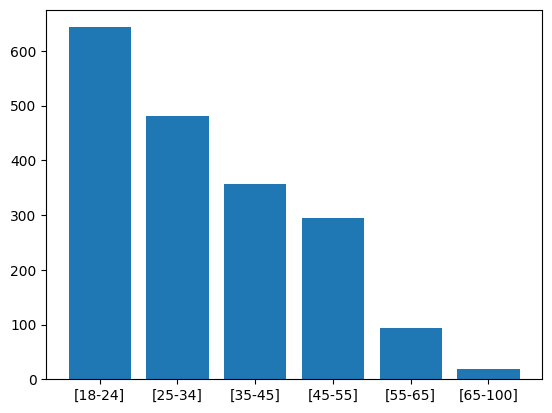

In [1516]:
testtest = data.groupby(by = "age").count().reset_index()
testtest
plt.bar(testtest["age"], testtest["gender"])

On remarque que le groupe de personne le plus représenté dans notre dataset sont les jeunes de 18 à 24 ans.

Tracons les courbes d'évolution des résultats des tests psychologiques en fonction de l'age des sujets.

C:\Users\arthu\AppData\Local\Temp\ipykernel_15892\1444364146.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_for_plot = data.groupby(by = "age").mean().reset_index()


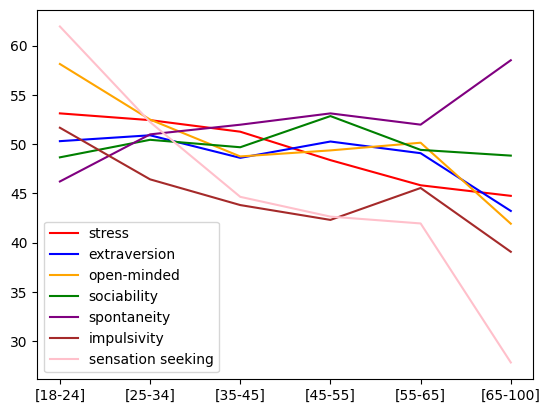

In [1517]:
df_for_plot = data.groupby(by = "age").mean().reset_index()
df_for_plot

plt.plot(df_for_plot["age"], df_for_plot["nscore"], label = "stress", c = "red")
plt.plot(df_for_plot["age"], df_for_plot["escore"], label = "extraversion", c = "blue")
plt.plot(df_for_plot["age"], df_for_plot["oscore"], label = "open-minded", c = "orange")
plt.plot(df_for_plot["age"], df_for_plot["ascore"], label = "sociability", c = "green")
plt.plot(df_for_plot["age"], df_for_plot["cscore"], label = "spontaneity", c = "purple")
plt.plot(df_for_plot["age"], df_for_plot["iscore"], label = "impulsivity", c = "brown")
plt.plot(df_for_plot["age"], df_for_plot["sscore"], label = "sensation seeking", c = "pink")

plt.legend()

On remarque que les tests auxquels les jeunes obtiennent des bons scores sont ceux où les personnes plus agées obtiennent de mauvais scores, et inversement.

On fait maintenant un zoom sur les résultats à ces tests des jeunes.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


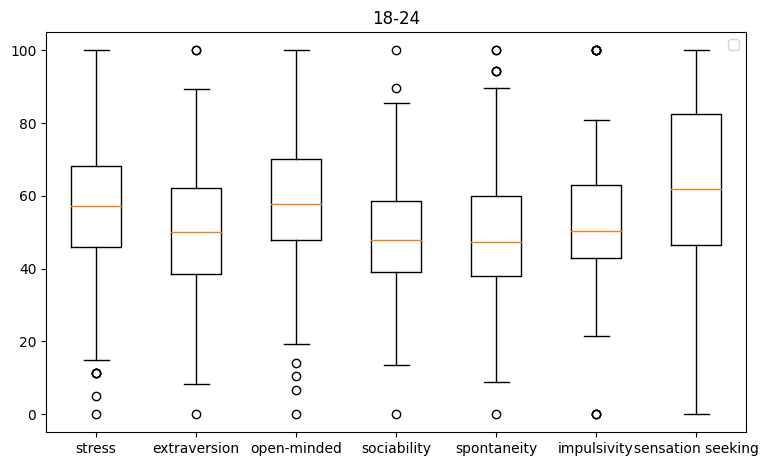

In [1518]:
fig = plt.figure(figsize =(7, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

plt.boxplot([
perso_jeunes["nscore"], 
perso_jeunes["escore"], 
perso_jeunes["oscore"], 
perso_jeunes["ascore"], 
perso_jeunes["cscore"], 
perso_jeunes["iscore"], 
perso_jeunes["sscore"]])

ax.set_xticklabels(["stress", "extraversion", "open-minded", "sociability", "spontaneity", "impulsivity", "sensation seeking"])

plt.title("18-24")
plt.legend()

C:\Users\arthu\AppData\Local\Temp\ipykernel_15892\1012335439.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_for_plot = data[data["age"] == "[18-24]"].groupby(by = "education").mean().reset_index()
C:\Users\arthu\AppData\Local\Temp\ipykernel_15892\1012335439.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(labels, rotation=90)


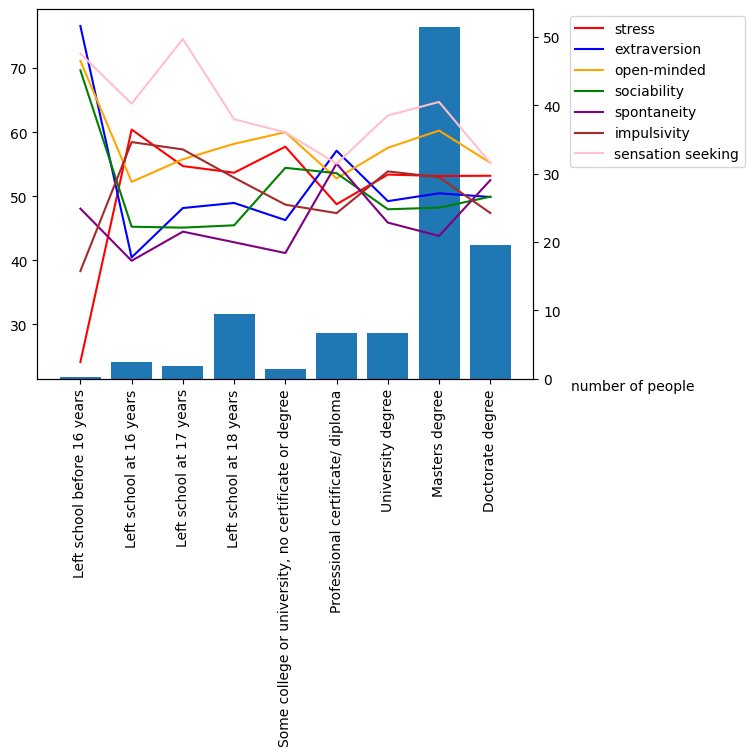

In [1519]:
df_for_plot = data[data["age"] == "[18-24]"].groupby(by = "education").mean().reset_index()
count = 100 * data[data["age"] == "[18-24]"].groupby(by = "education").count()["gender"] / data[data["age"] == "[18-24]"].shape[0]

fig = plt.subplot(111)

ax2 = fig.twinx()

fig.set_zorder(ax2.get_zorder() + 1)
fig.patch.set_visible(False)

fig.plot(df_for_plot["education"], df_for_plot["nscore"], label = "stress", c = "red")
fig.plot(df_for_plot["education"], df_for_plot["escore"], label = "extraversion", c = "blue")
fig.plot(df_for_plot["education"], df_for_plot["oscore"], label = "open-minded", c = "orange")
fig.plot(df_for_plot["education"], df_for_plot["ascore"], label = "sociability", c = "green")
fig.plot(df_for_plot["education"], df_for_plot["cscore"], label = "spontaneity", c = "purple")
fig.plot(df_for_plot["education"], df_for_plot["iscore"], label = "impulsivity", c = "brown")
fig.plot(df_for_plot["education"], df_for_plot["sscore"], label = "sensation seeking", c = "pink")

ax2.bar(df_for_plot["education"], count)
fig.set_xlabel('number of people')
fig.xaxis.set_label_coords(1.2, 0)

labels = ["Left school before 16 years", "Left school at 16 years", "Left school at 17 years", "Left school at 18 years", "Some college or university, no certificate or degree", "Professional certificate/ diploma", "University degree", "Masters degree", "Doctorate degree"]
fig.set_xticklabels(labels, rotation=90)

fig.legend(loc = "upper center", bbox_to_anchor=(1.25, 1))

In [1520]:
most_used_drugs = drugs_frequency_jeunes_int.reset_index()
most_used_drugs = most_used_drugs.loc[most_used_drugs["index"].isin(["CL6", "CL5", "CL4"])]
most_used_drugs = most_used_drugs.sum()
most_used_drugs

index        CL4CL5CL6
alcohol          84.14
amphet           20.37
amyl              3.26
benzos           20.84
caff             93.93
cannabis         70.92
choc             94.72
coke             14.15
crack             1.24
ecstasy           23.8
heroin             5.6
ketamine          8.24
legalhigh         23.8
LSD              19.29
meth             13.22
mushrooms        16.95
nicotine         61.43
semer             0.16
VSabuse           3.74
dtype: object

In [1521]:
df_for_plot2 = perso_jeunes.join(data[drugs_dure])
df_for_plot2 = df_for_plot2.loc[df_for_plot2["alcohol"].isin(["CL6", "CL5", "CL4"])]
df_for_plot2 = df_for_plot2.iloc[:, 0:7]
df_for_plot2

,nscore,escore,oscore,ascore,cscore,iscore,sscore
ID,,,,,,,
4,52.742145,37.688344,52.702274,58.521343,62.587620,21.540083,22.439822
34,61.737710,45.413311,57.765151,68.561870,51.340473,33.792023,13.246805
155,100.000000,28.979544,64.726809,43.458965,62.587620,42.847430,71.093268
167,78.836903,31.188205,64.726809,16.023595,23.843808,62.973510,53.955917
170,49.573837,50.050704,29.951875,58.521343,51.340473,33.792023,61.995745
...,...,...,...,...,...,...,...
1883,42.518516,54.917179,57.765151,45.645372,49.280109,62.973510,71.093268
1884,36.111111,76.587465,83.539901,60.982692,35.959460,62.973510,100.000000
1885,51.188454,76.587465,62.459963,60.982692,30.077917,62.973510,71.093268


Text(0.5, 1.0, '18-24')

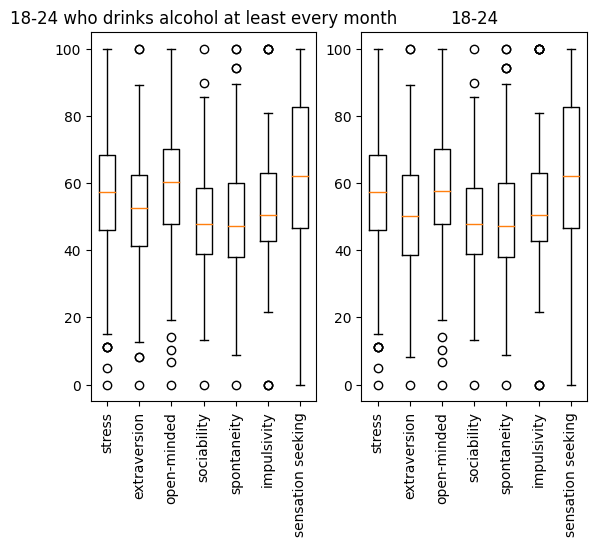

In [1522]:
fig, axis = plt.subplots(1, 2)
 
axis[0].boxplot([
df_for_plot2["nscore"], 
df_for_plot2["escore"], 
df_for_plot2["oscore"], 
df_for_plot2["ascore"], 
df_for_plot2["cscore"], 
df_for_plot2["iscore"], 
df_for_plot2["sscore"]])

axis[1].boxplot([
perso_jeunes["nscore"], 
perso_jeunes["escore"], 
perso_jeunes["oscore"], 
perso_jeunes["ascore"], 
perso_jeunes["cscore"], 
perso_jeunes["iscore"], 
perso_jeunes["sscore"]])

axis[0].set_xticklabels(["stress", "extraversion", "open-minded", "sociability", "spontaneity", "impulsivity", "sensation seeking"], rotation = 90)

axis[0].set_title("18-24 who drinks alcohol at least every month")

axis[1].set_xticklabels(["stress", "extraversion", "open-minded", "sociability", "spontaneity", "impulsivity", "sensation seeking"], rotation = 90)

axis[1].set_title("18-24")

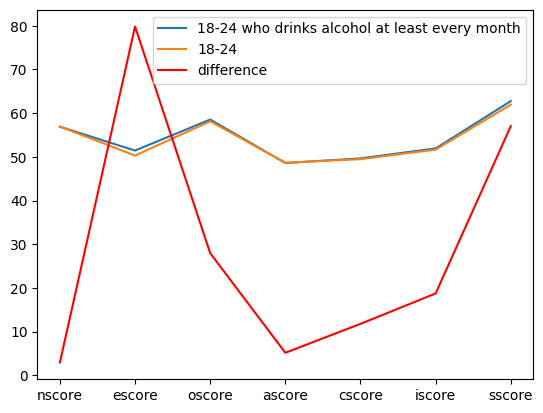

In [1529]:
plt.plot(df_for_plot2.columns, df_for_plot2.mean(), label = "18-24 who drinks alcohol at least every month")

plt.plot(perso_jeunes.columns, perso_jeunes.mean(), label = "18-24")

plt.plot(perso_jeunes.columns, 70 * np.abs(df_for_plot2.mean() - perso_jeunes.mean()), label = "difference", c = "red")

plt.legend()
#plt.xticks()
#plt.xticks(["stress", "extraversion", "open-minded", "sociability", "spontaneity", "impulsivity", "sensation seeking"], rotation = 90)
#plt.xticks()



In [1524]:
df_for_plot3 = perso_jeunes.join(data[drugs_dure])
df_for_plot3 = df_for_plot3.drop(["alcohol", "nicotine"], axis = 1)
df_for_plot3 = df_for_plot3.loc[
    df_for_plot3["amphet"].isin(["CL6", "CL5"]) | 
    df_for_plot3["benzos"].isin(["CL6", "CL5"]) | 
    df_for_plot3["coke"].isin(["CL6", "CL5"]) | 
    df_for_plot3["crack"].isin(["CL6", "CL5"]) | 
    df_for_plot3["ecstasy"].isin(["CL6", "CL5"]) | 
    df_for_plot3["heroin"].isin(["CL6", "CL5"]) | 
    df_for_plot3["ketamine"].isin(["CL6", "CL5"]) | 
    df_for_plot3["LSD"].isin(["CL6", "CL5"]) | 
    df_for_plot3["meth"].isin(["CL6", "CL5"]) | 
    df_for_plot3["mushrooms"].isin(["CL6", "CL5"])]

'''df_for_plot3 = df_for_plot3.loc[
    df_for_plot3["amphet"].isin(["CL6", "CL5", "CL4"]) | 
    df_for_plot3["benzos"].isin(["CL6", "CL5", "CL4"]) | 
    df_for_plot3["coke"].isin(["CL6", "CL5", "CL4"]) | 
    df_for_plot3["crack"].isin(["CL6", "CL5", "CL4"]) | 
    df_for_plot3["ecstasy"].isin(["CL6", "CL5", "CL4"]) | 
    df_for_plot3["heroin"].isin(["CL6", "CL5", "CL4"]) | 
    df_for_plot3["ketamine"].isin(["CL6", "CL5", "CL4"]) | 
    df_for_plot3["LSD"].isin(["CL6", "CL5", "CL4"]) | 
    df_for_plot3["meth"].isin(["CL6", "CL5", "CL4"]) | 
    df_for_plot3["mushrooms"].isin(["CL6", "CL5", "CL4"])]
'''
df_for_plot3 = df_for_plot3.iloc[:, 0:7]
df_for_plot3

,nscore,escore,oscore,ascore,cscore,iscore,sscore
ID,,,,,,,
155,100.000000,28.979544,64.726809,43.458965,62.587620,42.847430,71.093268
184,86.675988,43.280400,57.765151,39.017308,68.068528,33.792023,61.995745
345,58.671687,47.634800,52.702274,47.764811,47.274770,62.973510,30.801133
417,45.880579,33.321726,43.568983,20.001963,94.228816,42.847430,71.093268
418,54.284224,39.384471,57.765151,17.981965,34.106987,50.357257,71.093268
...,...,...,...,...,...,...,...
1876,42.518516,50.050704,92.671572,60.982692,30.077917,62.973510,100.000000
1879,54.284224,23.082809,62.459963,39.017308,51.340473,70.506794,82.575165
1881,78.836903,20.651022,43.568983,24.425291,62.587620,42.847430,82.575165


Text(0.5, 1.0, '18-24')

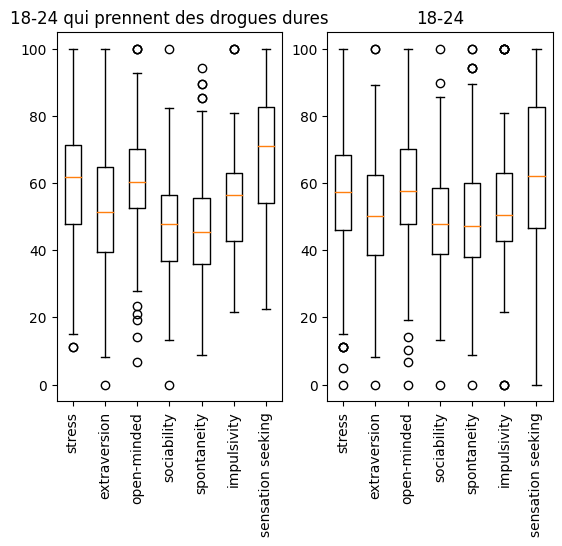

In [1525]:
fig, axis = plt.subplots(1, 2)
 
axis[0].boxplot([
df_for_plot3["nscore"], 
df_for_plot3["escore"], 
df_for_plot3["oscore"], 
df_for_plot3["ascore"], 
df_for_plot3["cscore"], 
df_for_plot3["iscore"], 
df_for_plot3["sscore"]])

axis[1].boxplot([
perso_jeunes["nscore"], 
perso_jeunes["escore"], 
perso_jeunes["oscore"], 
perso_jeunes["ascore"], 
perso_jeunes["cscore"], 
perso_jeunes["iscore"], 
perso_jeunes["sscore"]])

axis[0].set_xticklabels(["stress", "extraversion", "open-minded", "sociability", "spontaneity", "impulsivity", "sensation seeking"], rotation = 90)

axis[0].set_title("18-24 qui prennent des drogues dures")

axis[1].set_xticklabels(["stress", "extraversion", "open-minded", "sociability", "spontaneity", "impulsivity", "sensation seeking"], rotation = 90)

axis[1].set_title("18-24")

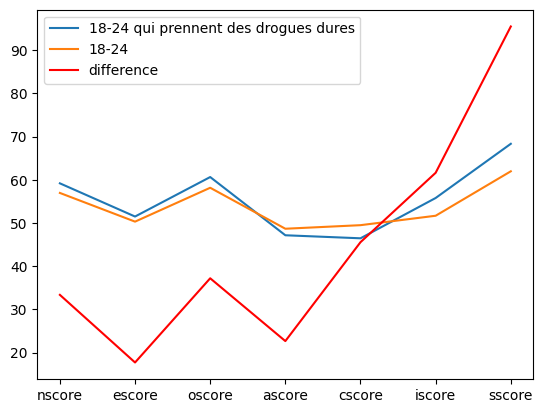

In [1526]:
plt.plot(df_for_plot3.columns, df_for_plot3.mean(), label = "18-24 qui prennent des drogues dures")

plt.plot(perso_jeunes.columns, perso_jeunes.mean(), label = "18-24")

plt.plot(perso_jeunes.columns, 15 * np.abs(df_for_plot3.mean() - perso_jeunes.mean()), label = "difference", c = "red")

plt.legend()
#plt.xticks()
#plt.xticks(["stress", "extraversion", "open-minded", "sociability", "spontaneity", "impulsivity", "sensation seeking"], rotation = 90)
#plt.xticks()

In [1547]:
df_for_plot4 = perso_jeunes.join(drugs_jeunes)

df_for_plot4_nscore = df_for_plot4.loc[df_for_plot4["nscore"] > df_for_plot4["nscore"].mean()]

df_for_plot4_nscore = df_for_plot4_nscore.loc[
    df_for_plot4_nscore["amphet"].isin(["CL6", "CL5", "CL4"]) | 
    df_for_plot4_nscore["benzos"].isin(["CL6", "CL5", "CL4"]) | 
    df_for_plot4_nscore["coke"].isin(["CL6", "CL5", "CL4"]) | 
    df_for_plot4_nscore["crack"].isin(["CL6", "CL5", "CL4"]) | 
    df_for_plot4_nscore["ecstasy"].isin(["CL6", "CL5", "CL4"]) | 
    df_for_plot4_nscore["heroin"].isin(["CL6", "CL5", "CL4"]) | 
    df_for_plot4_nscore["ketamine"].isin(["CL6", "CL5", "CL4"]) | 
    df_for_plot4_nscore["LSD"].isin(["CL6", "CL5", "CL4"]) | 
    df_for_plot4_nscore["meth"].isin(["CL6", "CL5", "CL4"]) | 
    df_for_plot4_nscore["mushrooms"].isin(["CL6", "CL5", "CL4"])]

df_for_plot4_nscore

,nscore,escore,oscore,ascore,cscore,iscore,sscore,alcohol,amphet,amyl,...,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,semer,VSabuse
ID,,,,,,,,,,,,,,,,,,,,,
155,100.000000,28.979544,64.726809,43.458965,62.587620,42.847430,71.093268,CL5,CL0,CL0,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
184,86.675988,43.280400,57.765151,39.017308,68.068528,33.792023,61.995745,CL6,CL3,CL0,...,CL3,CL0,CL3,CL3,CL0,CL0,CL0,CL6,CL0,CL6
345,58.671687,47.634800,52.702274,47.764811,47.274770,62.973510,30.801133,CL5,CL2,CL3,...,CL3,CL3,CL0,CL3,CL2,CL2,CL2,CL6,CL0,CL0
449,73.129748,72.208935,70.217503,24.425291,39.653123,70.506794,82.575165,CL5,CL0,CL2,...,CL2,CL0,CL0,CL3,CL4,CL0,CL3,CL5,CL0,CL0
459,65.126020,50.050704,55.304637,58.521343,55.453164,42.847430,53.955917,CL6,CL4,CL2,...,CL4,CL0,CL4,CL4,CL3,CL0,CL3,CL6,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,65.126020,59.740434,100.000000,34.480106,68.068528,62.973510,82.575165,CL5,CL3,CL0,...,CL5,CL0,CL0,CL3,CL4,CL3,CL4,CL5,CL0,CL0
1870,57.273890,37.688344,76.256651,54.154158,78.755064,33.792023,46.565805,CL6,CL0,CL0,...,CL4,CL0,CL0,CL4,CL3,CL0,CL3,CL4,CL0,CL0
1875,71.354147,43.280400,76.256651,34.480106,55.453164,33.792023,61.995745,CL6,CL3,CL0,...,CL3,CL6,CL3,CL5,CL3,CL3,CL0,CL6,CL0,CL6


# partie des visuels à ctrl C ctrl V

In [ ]:
df_for_plot = data_encoded.copy()
df_for_plot_stress_sup = df_for_plot.loc[df_for_plot["Stress_score"] > df_for_plot["Stress_score"].mean()][['alcohol', 'amphet', 'benzos', 'cannabis', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalhigh', 'LSD', 'meth', 'mushrooms', 'nicotine']]
for i in range(0, df_for_plot_stress_sup.shape[1]):
    for j in range(0, df_for_plot_stress_sup.shape[0]):
        if df_for_plot_stress_sup.iloc[j][i] <= 4:
            df_for_plot_stress_sup.iloc[j][i] = 0
        else:
            df_for_plot_stress_sup.iloc[j][i] = 1

In [ ]:
df_for_plot = data_encoded.copy()
df_for_plot_stress_inf = df_for_plot.loc[df_for_plot["Stress_score"] < df_for_plot["Stress_score"].mean()][['alcohol', 'amphet', 'benzos', 'cannabis', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalhigh', 'LSD', 'meth', 'mushrooms', 'nicotine']]
for i in range(0, df_for_plot_stress_inf.shape[1]):
    for j in range(0, df_for_plot_stress_inf.shape[0]):
        if df_for_plot_stress_inf.iloc[j][i] <= 4:
            df_for_plot_stress_inf.iloc[j][i] = 0
        else:
            df_for_plot_stress_inf.iloc[j][i] = 1

In [ ]:
plt.figure(figsize=(15, 4))
plt.subplot(131)

plt.bar(df_for_plot_stress_inf.columns, 100 * df_for_plot_stress_inf.sum() / df_for_plot_stress_inf.shape[0])

plt.title("stress < moyenne")
plt.xticks(rotation = 90)


plt.subplot(132)

plt.bar(df_for_plot_stress_sup.columns, 100 * df_for_plot_stress_sup.sum() / df_for_plot_stress_sup.shape[0])

plt.title("stress > moyenne")
plt.xticks(rotation = 90)


plt.subplot(133)

plt.bar(df_for_plot_stress_sup.columns, 100 * df_for_plot_stress_sup.sum() / df_for_plot_stress_sup.shape[0] - 100 * df_for_plot_stress_inf.sum() / df_for_plot_stress_inf.shape[0])

plt.xticks(rotation = 90)
plt.title("différence")

In [ ]:
df_for_plot = data_encoded.copy()
df_for_plot_communi_sup = df_for_plot.loc[df_for_plot["communicative_score"] > df_for_plot["communicative_score"].mean()][['alcohol', 'amphet', 'benzos', 'cannabis', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalhigh', 'LSD', 'meth', 'mushrooms', 'nicotine']]
for i in range(0, df_for_plot_communi_sup.shape[1]):
    for j in range(0, df_for_plot_communi_sup.shape[0]):
        if df_for_plot_communi_sup.iloc[j][i] <= 4:
            df_for_plot_communi_sup.iloc[j][i] = 0
        else:
            df_for_plot_communi_sup.iloc[j][i] = 1

In [ ]:
df_for_plot = data_encoded.copy()
df_for_plot_communi_inf = df_for_plot.loc[df_for_plot["communicative_score"] < df_for_plot["communicative_score"].mean()][['alcohol', 'amphet', 'benzos', 'cannabis', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalhigh', 'LSD', 'meth', 'mushrooms', 'nicotine']]
for i in range(0, df_for_plot_communi_inf.shape[1]):
    for j in range(0, df_for_plot_communi_inf.shape[0]):
        if df_for_plot_communi_inf.iloc[j][i] <= 4:
            df_for_plot_communi_inf.iloc[j][i] = 0
        else:
            df_for_plot_communi_inf.iloc[j][i] = 1

In [ ]:
plt.figure(figsize=(15, 4))
plt.subplot(131)

plt.bar(df_for_plot_communi_inf.columns, 100 * df_for_plot_communi_inf.sum() / df_for_plot_communi_inf.shape[0])

plt.title("communication < moyenne")
plt.xticks(rotation = 90)


plt.subplot(132)

plt.bar(df_for_plot_communi_sup.columns, 100 * df_for_plot_communi_sup.sum() / df_for_plot_communi_sup.shape[0])

plt.title("communication > moyenne")
plt.xticks(rotation = 90)


plt.subplot(133)

plt.bar(df_for_plot_communi_sup.columns, 100 * df_for_plot_communi_sup.sum() / df_for_plot_communi_sup.shape[0] - 100 * df_for_plot_communi_inf.sum() / df_for_plot_communi_inf.shape[0])

plt.xticks(rotation = 90)
plt.title("différence")

In [ ]:
df_for_plot = data_encoded.copy()
df_for_plot_impuls_sup = df_for_plot.loc[df_for_plot["impulsive_score"] > df_for_plot["impulsive_score"].mean()][['alcohol', 'amphet', 'benzos', 'cannabis', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalhigh', 'LSD', 'meth', 'mushrooms', 'nicotine']]
for i in range(0, df_for_plot_impuls_sup.shape[1]):
    for j in range(0, df_for_plot_impuls_sup.shape[0]):
        if df_for_plot_impuls_sup.iloc[j][i] <= 4:
            df_for_plot_impuls_sup.iloc[j][i] = 0
        else:
            df_for_plot_impuls_sup.iloc[j][i] = 1

In [ ]:
df_for_plot = data_encoded.copy()
df_for_plot_impuls_inf = df_for_plot.loc[df_for_plot["impulsive_score"] < df_for_plot["impulsive_score"].mean()][['alcohol', 'amphet', 'benzos', 'cannabis', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalhigh', 'LSD', 'meth', 'mushrooms', 'nicotine']]
for i in range(0, df_for_plot_impuls_inf.shape[1]):
    for j in range(0, df_for_plot_impuls_inf.shape[0]):
        if df_for_plot_impuls_inf.iloc[j][i] <= 4:
            df_for_plot_impuls_inf.iloc[j][i] = 0
        else:
            df_for_plot_impuls_inf.iloc[j][i] = 1

In [ ]:
plt.figure(figsize=(15, 4))
plt.subplot(131)

plt.bar(df_for_plot_impuls_inf.columns, 100 * df_for_plot_impuls_inf.sum() / df_for_plot_impuls_inf.shape[0])

plt.title("impulsivité < moyenne")
plt.xticks(rotation = 90)


plt.subplot(132)

plt.bar(df_for_plot_impuls_sup.columns, 100 * df_for_plot_impuls_sup.sum() / df_for_plot_impuls_sup.shape[0])

plt.title("impulsivité > moyenne")
plt.xticks(rotation = 90)


plt.subplot(133)

plt.bar(df_for_plot_impuls_sup.columns, 100 * df_for_plot_impuls_sup.sum() / df_for_plot_impuls_sup.shape[0] - 100 * df_for_plot_impuls_inf.sum() / df_for_plot_impuls_inf.shape[0])

plt.xticks(rotation = 90)
plt.title("différence")

Health : Polyconsommation VS Consommation (quelle pondération ? )
